MSE en datos de prueba: 1.8886363636363637
MAE en datos de prueba: 0.175
R² en datos de prueba: 0.9553766205173574


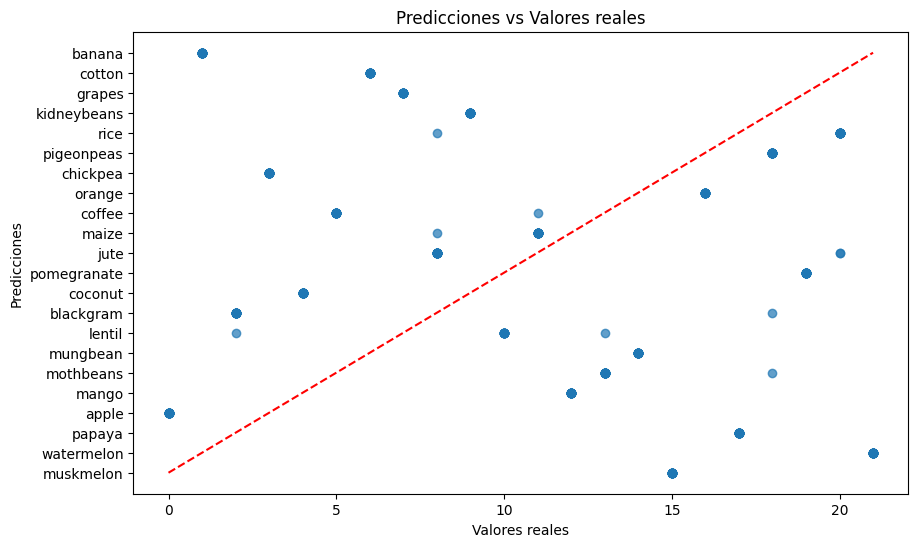

In [1]:
# model_inference.py
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Cargar el modelo, el escalador y los datos preprocesados
model = joblib.load('decision_tree_model.pkl')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')
X_train, X_test, y_train, y_test = joblib.load('preprocessed_data.pkl')

# Usar los datos de prueba originales
X_new = X_test  # Usamos los datos de prueba preprocesados
y_real = y_test  # Valores reales de y_test

# Realizar predicciones
y_pred = model.predict(X_new)

# Invertir la codificación de las predicciones para obtener las etiquetas originales
y_pred_labels = label_encoder.inverse_transform(y_pred.astype(int))

# Evaluar el rendimiento con varias métricas
mse = mean_squared_error(y_real, y_pred)
mae = mean_absolute_error(y_real, y_pred)
r2 = r2_score(y_real, y_pred)

print(f'MSE en datos de prueba: {mse}')
print(f'MAE en datos de prueba: {mae}')
print(f'R² en datos de prueba: {r2}')

# Visualización: Comparar valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_real, y_pred_labels, alpha=0.7)
plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], color='red', linestyle='--')  # Línea de identidad
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()


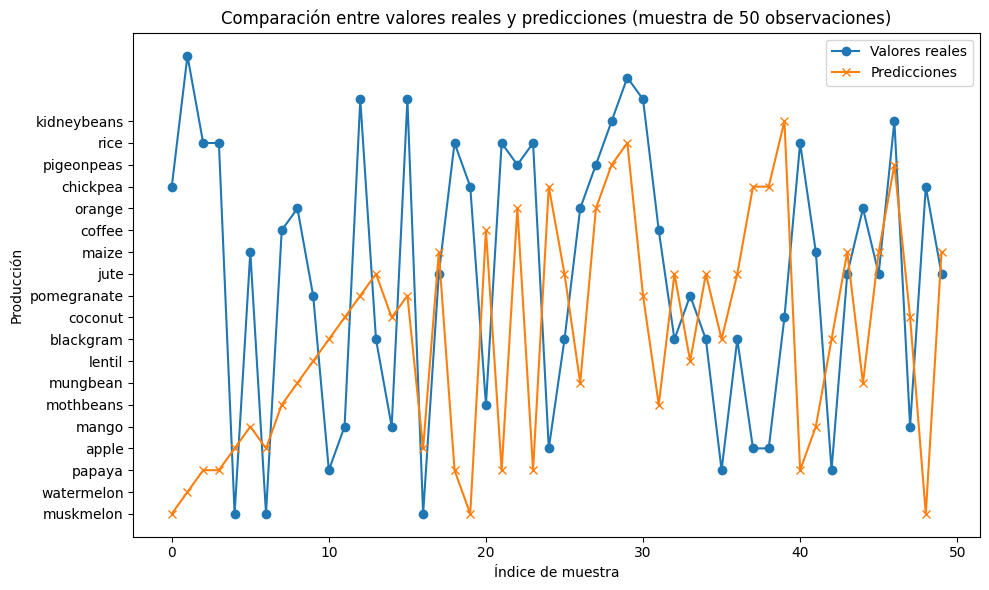

In [2]:
import numpy as np
# Seleccionar una muestra de los datos (ejemplo: las primeras 100 observaciones)
sample_size = 50
y_real_sample = y_real[:sample_size]
y_pred_sample = y_pred_labels[:sample_size]

# Crear un gráfico de líneas para la muestra
plt.figure(figsize=(10, 6))

# Línea de valores reales
plt.plot(np.arange(sample_size), y_real_sample, label='Valores reales', marker='o')

# Línea de predicciones
plt.plot(np.arange(sample_size), y_pred_sample, label='Predicciones', marker='x')

# Añadir etiquetas y leyenda
plt.xlabel('Índice de muestra')
plt.ylabel('Producción')
plt.title(f'Comparación entre valores reales y predicciones (muestra de {sample_size} observaciones)')
plt.legend()

plt.tight_layout()
plt.show()
